## 100318577 - Summative Assessment Tasks

Now that you have seen how to load data, extract slices and make basic plots, you can start work on the summative assessment task. 

This will require you to perform some statistical analysis on a large dataset extracted from CMIP6 climate model output. Specifically we will be looking at the ocean temperature simulated by the GFDL-CM4 model. Note that this is just a simulation forced by solar radiation and greenhouse gas concentrations. The historical simulation will broadly match historical trends but will **not** simulate the same (quasi-random) year-to-year variability as the real world - for example, it will not contain the 1997-98 El Niño event. The future simulation is projected based on one - very pessimistic - scenario for future greenhouse gas emissions. Again, this is **not** a *prediction* of the future, just one plausible future. 

Note that some of the tasks require functions that you have **not** yet been introduced to, but you will see these in upcoming lectures and labs. 

You should be able to get started, load the data set and complete task 1.

### Start by importing the required modules
**Notes:**  
- Run This [ ] = only run this cell when coming back to continue summative tasks in this order
- Dont run = Dont run cell

In [1]:
## RUN THIS [1]
# Start by importing our modules 
import xarray as xr
import pandas as pd
import numpy as np
from scipy import stats

import cartopy.crs as ccrs # making geographical plots
from matplotlib import pyplot as plt

import warnings # reduce cluttered output

In [2]:
# Suppress warnings
warnings.filterwarnings("ignore")

### Now load the data
Just run the cell below to load the full datasets

In [ ]:
## DONT RUN
# Load the historical model output dataset
ds_hist = xr.open_mfdataset('shared-datasets/thetao_hist/*.nc')

# load the future model output data set
ds_fut = xr.open_mfdataset('shared-datasets/thetao_fut/*.nc')

t_hist = ds_hist.thetao
t_fut = ds_fut.thetao

### Extract a slice

Now extract slices of data from the full dataset to help you answer the assessment tasks. 

Note that the summative assessment task requires you to load data for the following time periods:

- 1950-2000 for the historical dataset
- 2050-2100 for the future 

For each period you should select the geographical region between 260-360E and 10-60N. 

You should then select one slice for each of the following levels:
- 2.5 m
- 2500 m

Note that in this dataset, 
- the level dimension is called `lev`
- the latitude dimension is called `lat`
- the longitude dimension is called `lon`
- The temperature data that you need to analyse is called `thetao` 

In [ ]:
## DONT RUN
# fill in the ellipses (...) below to extract the correct regions
# da_subregion = da.sel(longitude=slice(260,360), latitude=slice(10,60))

# fill in the ellipses (...) below to extract the correct regions
t_hist_slice = t_hist.sel(time=slice('1950-01-01', '2000-12-31'), lat=slice(10,60), lon=slice(260,360))
t_hist_2p5m = t_hist_slice.sel(lev=2.5)
t_hist_2500m = t_hist_slice.sel(lev=2500)

t_fut_slice = t_fut.sel(time=slice('2050-01-01', '2100-12-31'), lat=slice(10,60), lon=slice(260,360))
t_fut_2p5m = t_fut_slice.sel(lev=2.5)
t_fut_2500m = t_fut_slice.sel(lev=2500)

To test that you have extracted your slices correctly, run the four cells below and look at the output from each:

In [ ]:
t_hist_2p5m ## DONT RUN

In [ ]:
t_hist_2500m ## DONT RUN

In [ ]:
t_fut_2p5m ## DONT RUN

In [ ]:
t_fut_2500m ## DONT RUN

All the files above should be the same size, have the correct levels, time ranges and latitude/longitude ranges. 

They should all be slightly less than 15 MB

If they are, congratulations. You can now save your datasets using the code below:

In [ ]:
## DONT RUN
# Just run this cell
t_hist_2p5m.to_netcdf('t_hist_2p5m.nc')
t_hist_2500m.to_netcdf('t_hist_2500m.nc')
t_fut_2p5m.to_netcdf('t_fut_2p5m.nc')
t_fut_2500m.to_netcdf('t_fut_2500m.nc')

Once you have saved your data, each time you return to this task you can just load each output file using the code below:

In [3]:
## RUN THIS [2]
t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_hist_2500m = xr.open_dataset('t_hist_2500m.nc').thetao
t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao
t_fut_2500m = xr.open_dataset('t_fut_2500m.nc').thetao

## Hints
- Remember that the area of each grid cell in a latitude-longitude grid is proportional to the cosine of the latitude (but also remember that latitude is in degrees and numpy's cosine function expects radians.
- You may wish to use additional matplotlib functions to make your plots attractive. There is extensive help available online. 
- Think about how to bin data by month to calculate the annual cycle, and resample to annual means to calculate the year-to-year variability.
- Consider the best statistical tests to use for Tasks 2 and 4


You will need to submit:
1. A jupyter notebook (or multiple notebooks, or other commented code) containing:
    1. The code you used to perform your analysis **(Tasks 1-4)**
    2. The results of your calculations **(Tasks 1-4)**
    3. Visualisations to illustrate your results **(Task 5)**
    4. Brief (< 50 words each) descriptions of the purpose of each block of code **(Tasks 1-4)**
    5. A brief written summary of your key findings and how they answer the questions above (500 words max). **(Tasks 1-4)**
2.  pre-recorded video or audio file, where you describe how you approached the assessment tasks. The duration should be 5-7 minutes. You do not need to explain every block of code – focus on the main components that enabled you to answer the questions. **(OneDrive link)** https://ueanorwich-my.sharepoint.com/:f:/g/personal/zrt20ynu_uea_ac_uk/EplHLglmEq5Dv82ydagAP5cB_cZBjwycCu5J8p0F9KOIsg?e=IVzTrG 


__________________________________________________________________________________________________________________________________________________________________________________________________________

## Assessment tasks
Unless instructed otherwise, perform your analysis at both 2.5 m and 2500 m depth in the North Atlantic region (260-360E, 10-60N). You will need to write code to extract the appropriate levels and geographical region. 

### Tasks 5 and 6
The making of figures and written summaries of key findings and how these align with the questions are embedded within tasks 1 to 4. 

### Audio walkthrough 
**(OneDrive link)** https://ueanorwich-my.sharepoint.com/:f:/g/personal/zrt20ynu_uea_ac_uk/EplHLglmEq5Dv82ydagAP5cB_cZBjwycCu5J8p0F9KOIsg?e=IVzTrG 

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Task 1
Calculate the spatially-weighted average temperature for each time period. Using this, 
- (a) calculate and plot the difference in the average temperature for each month of the year between the two periods and compare that with the variability in the temperature for each month of the year;
- (b) calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period. 

**Calculate the spatially-weighted average temperature for each time period.**

This code calculates the spatially-weighted average temperatures for historical (1950-2000) and future (2050-2100) periods at depths of 2.5m and 2500m. It defines a function to compute weighted averages using latitude-based weights and then applies this function to the temperature data for both periods and depths. Finally, it prints the average potential temperatures, highlighting how these temperatures might change over time.

In [4]:
# Suppress warnings
warnings.filterwarnings("ignore")

def calculate_spatial_average(thetao):
    # Calculate weights based on cosine of latitude in radians
    weights = np.cos(np.deg2rad(thetao.lat))
    # Create a weights array matching the thetao dimensions
    weights_array = weights / weights.sum()
    # Calculate weighted mean over lat and lon dimensions
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    
    return spatial_mean

# calculate Spatial average for historical and future period
hist_2p5m_avg = calculate_spatial_average(t_hist_2p5m).mean()
hist_2500m_avg = calculate_spatial_average(t_hist_2500m).mean()
fut_2p5m_avg = calculate_spatial_average(t_fut_2p5m).mean()
fut_2500m_avg = calculate_spatial_average(t_fut_2500m).mean()

# Print results to 2dp
print("Historical Period (1950-2000) Average Potential Temperature:")
print(f"2.5m: {hist_2p5m_avg.values:.2f}")
print(f"2500m: {hist_2500m_avg.values:.2f}")
print("\nFuture Period (2050-2100) Average Potential Temperature:")
print(f"2.5m: {fut_2p5m_avg.values:.2f}")
print(f"2500m: {fut_2500m_avg.values:.2f}")

Historical Period (1950-2000) Average Potential Temperature:
2.5m: 19.65
2500m: 4.05

Future Period (2050-2100) Average Potential Temperature:
2.5m: 22.60
2500m: 4.23


__________________________________________________________________________________________________________________________________________________________________________________________________________

(a) calculate and plot the difference in the average temperature for each month of the year between the two periods and compare that with the variability in the temperature for each month of the year

The following code calculates and plots the differences in monthly average temperatures and their variability between historical (1950-2000) (figure 1) and future (2050-2100)(figure 2) periods at 2.5m and 2500m depths, visualizing potential temperature changes over time.

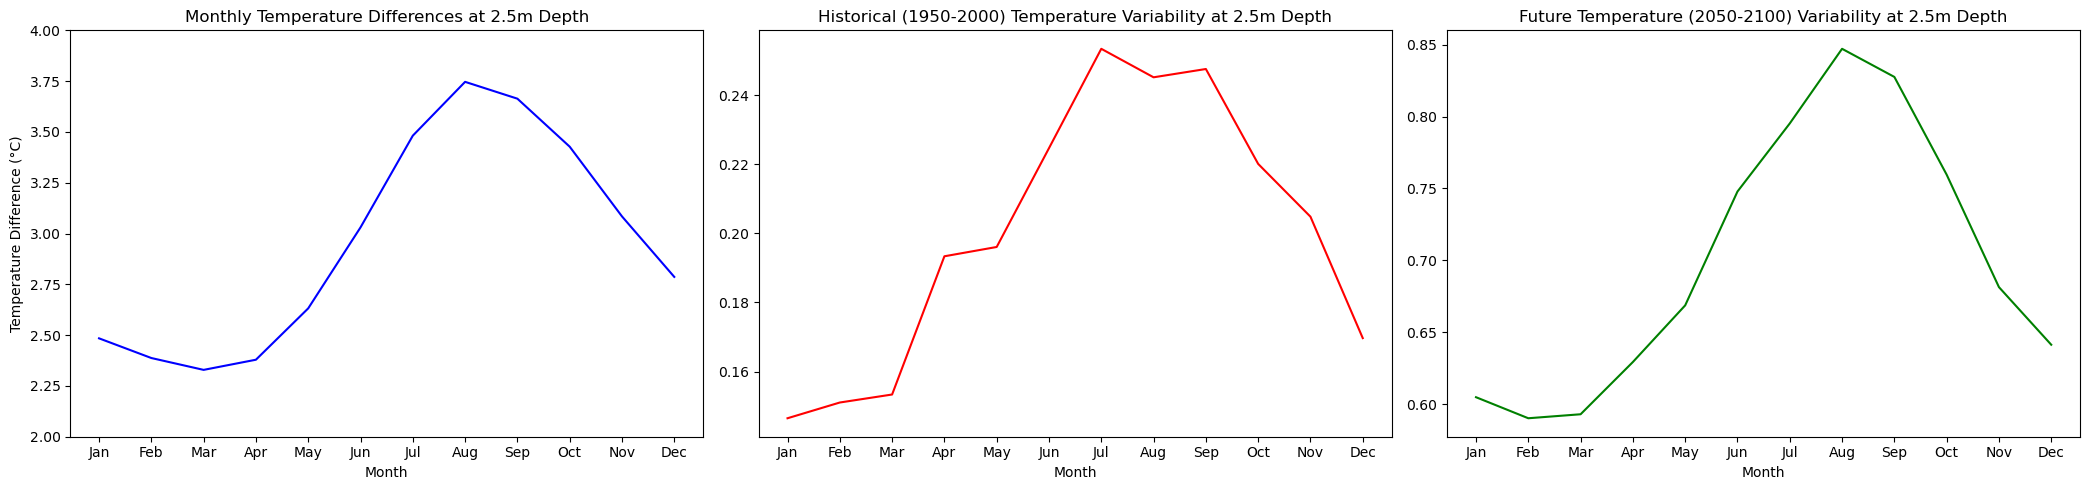

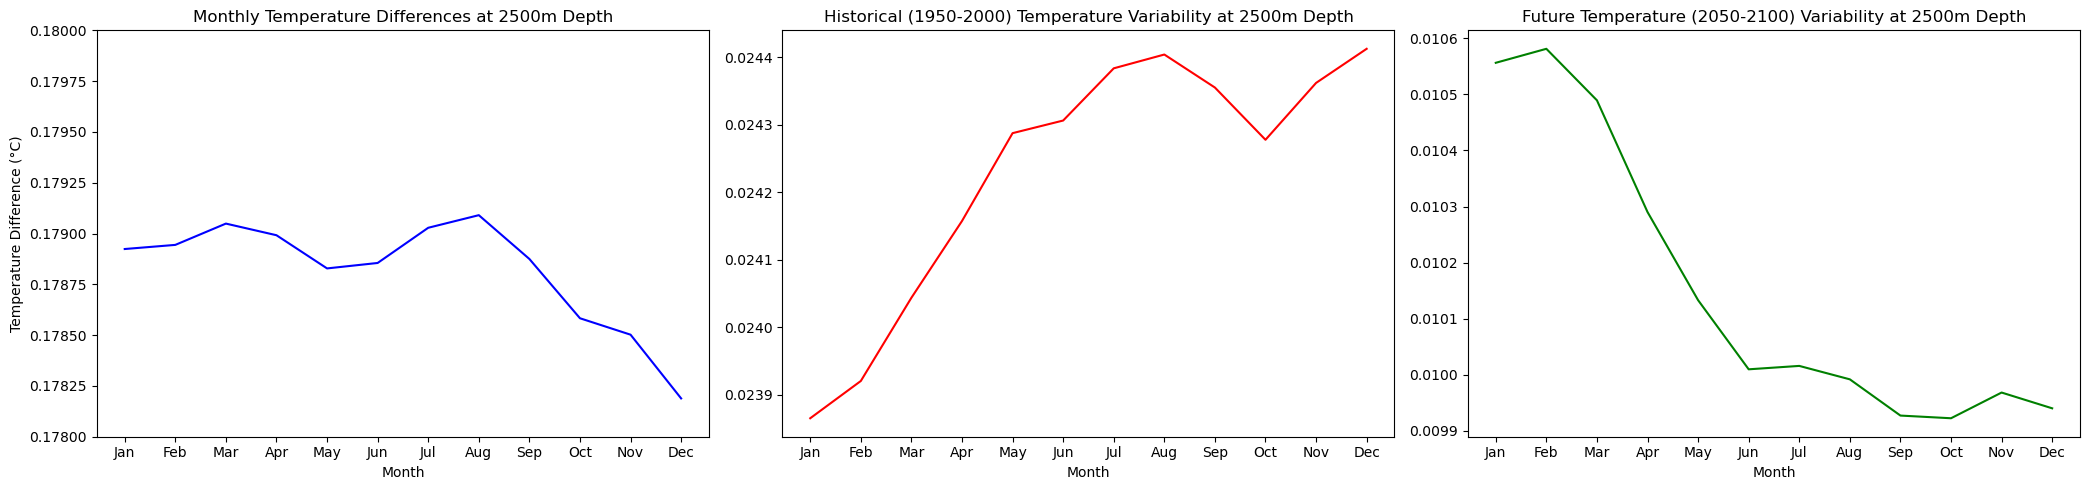

In [6]:
def calculate_spatial_average(thetao):
    weights = np.cos(np.deg2rad(thetao.lat))
    weights_array = weights / weights.sum()
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    return spatial_mean

def monthly_analysis(hist_avg, fut_avg):
    hist_monthly = hist_avg.groupby('time.month').mean(dim='time') # group by month for historical
    fut_monthly = fut_avg.groupby('time.month').mean(dim='time')   # group by month for future
    monthly_diff = fut_monthly - hist_monthly                      # calculate monthly difference between future and historical period
    hist_variability = hist_avg.groupby('time.month').std(dim='time') # calculate standard deviation for historical
    fut_variability = fut_avg.groupby('time.month').std(dim='time')   # calculate standard deviation for future
    return monthly_diff, hist_variability, fut_variability

# Calculate spatially-weighted average temperature for historical data
hist_avg_2p5m = calculate_spatial_average(t_hist_2p5m)
hist_avg_2500m = calculate_spatial_average(t_hist_2500m)

# Calculate spatially-weighted average temperature for future data
fut_avg_2p5m = calculate_spatial_average(t_fut_2p5m)
fut_avg_2500m = calculate_spatial_average(t_fut_2500m)

# Perform monthly analysis
monthly_diff_2p5m, hist_variability_2p5m, fut_variability_2p5m = monthly_analysis(hist_avg_2p5m, fut_avg_2p5m)
monthly_diff_2500m, hist_variability_2500m, fut_variability_2500m = monthly_analysis(hist_avg_2500m, fut_avg_2500m)

# Define months names for plotting
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plot 2.5m depth 
plt.figure(figsize=(21, 5))

# Monthly Temperature Differences at 2.5m Depth
plt.subplot(1, 3, 1) # 1x3 grid pattern
plt.plot(months, monthly_diff_2p5m, color='blue')
plt.ylim(2, 4)
plt.title('Monthly Temperature Differences at 2.5m Depth')
plt.xlabel('Month')
plt.ylabel('Temperature Difference (°C)')

# Historical (1950-2000) Temperature Variability (std dev) at 2.5m Depth
plt.subplot(1, 3, 2)
plt.plot(months, hist_variability_2p5m, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2.5m Depth')
plt.xlabel('Month')

# Future Temperature (2050-2100) Variability (std dev) at 2.5m Depth
plt.subplot(1, 3, 3)
plt.plot(months, fut_variability_2p5m, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2.5m Depth')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

# Plot 2500m depth
plt.figure(figsize=(21, 5))

# Monthly Temperature Differences at 2500m Depth
plt.subplot(1, 3, 1)
plt.plot(months, monthly_diff_2500m, color='blue')
plt.ylim(0.1780, 0.180)
plt.title('Monthly Temperature Differences at 2500m Depth')
plt.xlabel('Month')
plt.ylabel('Temperature Difference (°C)')

# Historical (1950-2000) Temperature Variability (std dev) at 2500m Depth
plt.subplot(1, 3, 2)
plt.plot(months, hist_variability_2500m, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2500m Depth')
plt.xlabel('Month')

# Future Temperature (2050-2100) Variability (std dev) at 2500m Depth
plt.subplot(1, 3, 3)
plt.plot(months, fut_variability_2500m, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2500m Depth')
plt.xlabel('Month')

plt.tight_layout()
plt.show() # print


**Figure 1:** Monthly temperature differences and variability at two depths (2.5m and 2500m) for historical (1950-2000) and future (2050-2100) periods. The top row (left to right) shows data for 2.5m depth: Monthly temperature differences, Historical temperature variability, and Future temperature variability. The bottom row (left to right) shows data for 2500m depth: (d) Monthly temperature differences, (e) Historical temperature variability, and Future temperature variability. The x-axis represents months from January to December, and the y-axis represents temperature differences in °C or variability in °C.

__________________________________________________________________________________________________________________________________________________________________________________________________________

(b) calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period.

This code calculates the differences in time-mean temperatures and compares them to year-to-year variability for historical (1950-2000) and future (2050-2100) periods at 2.5m and 2500m depths. It uses functions to compute spatially-weighted averages, calculates yearly average temperatures, and determines differences between historical and future averages, as well as measures variability. Finally, it plots these differences and variabilities for each depth and period, providing a visual representation of potential temperature changes and their variability over time.

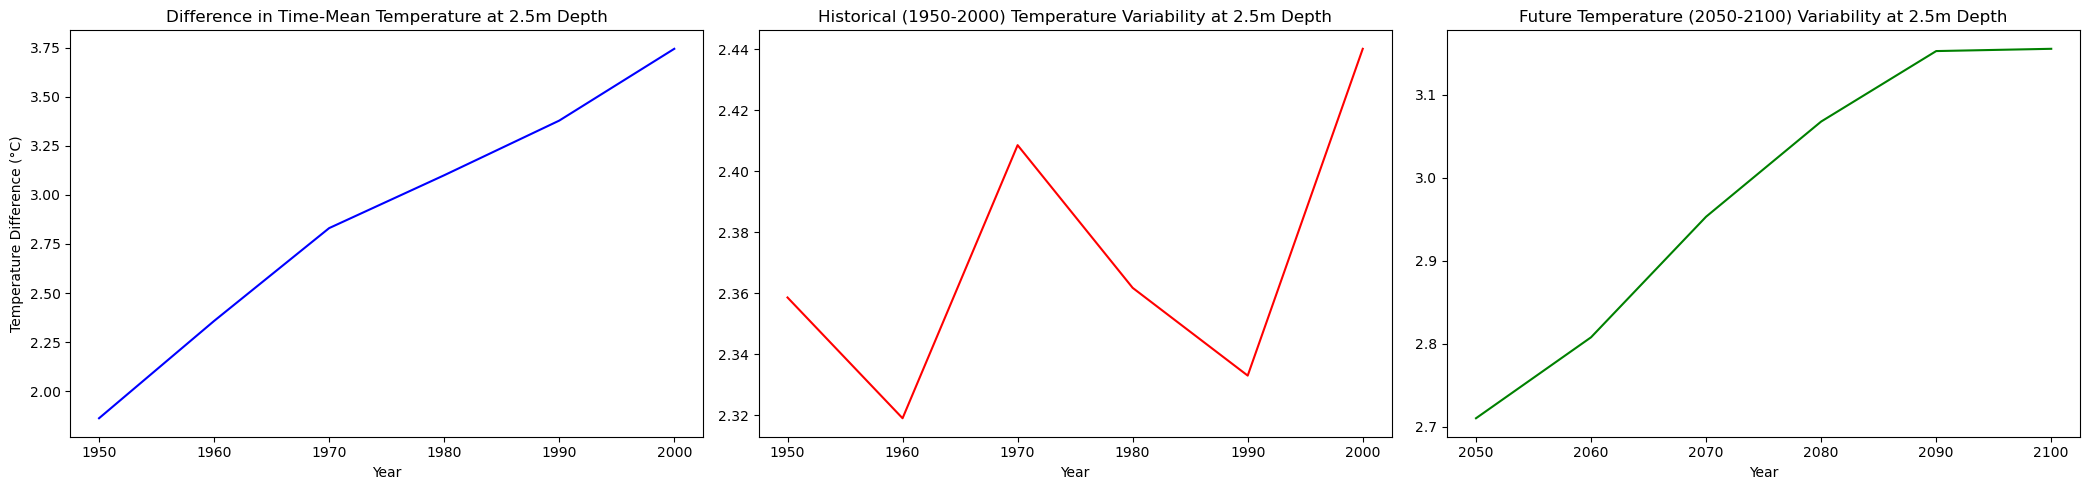

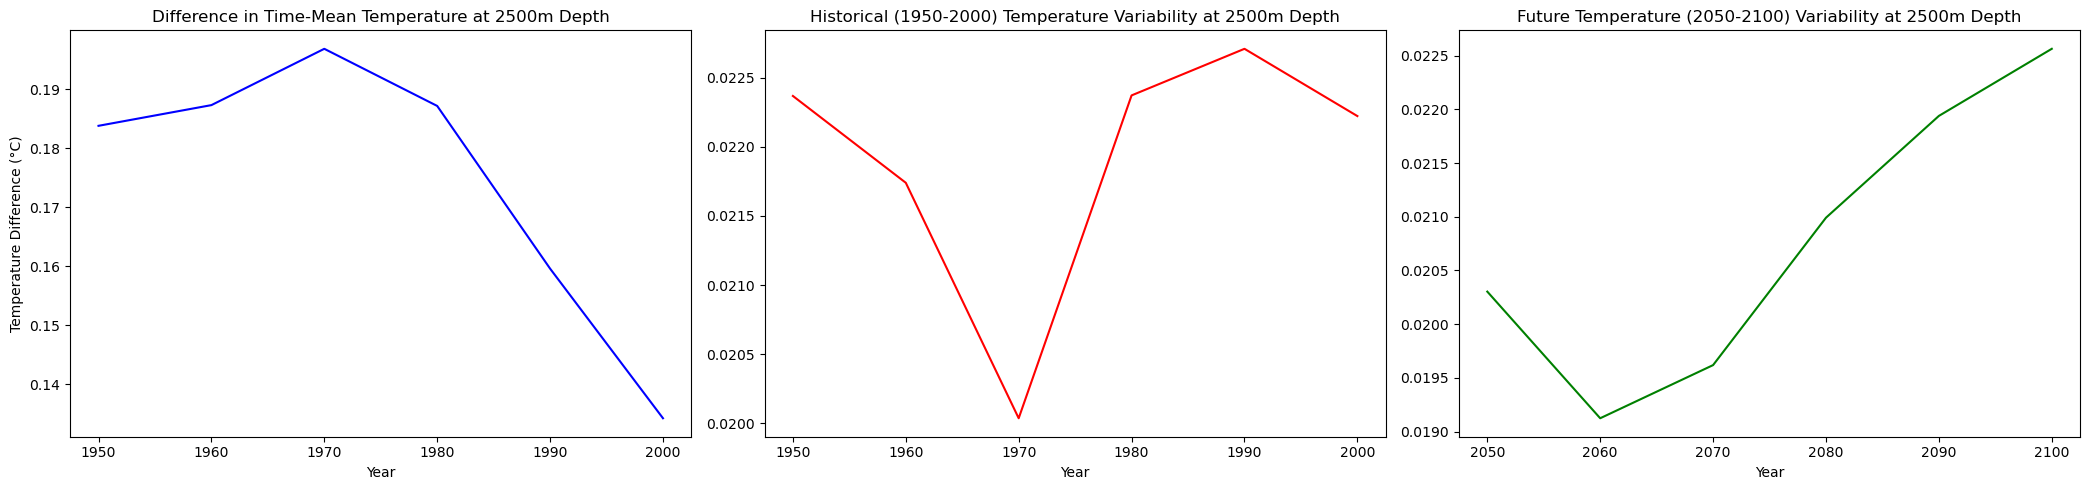

In [7]:
# Define lists of years for historical and future periods
hist_years = ["1950", "1960", "1970", "1980", "1990", "2000"]
fut_years = ["2050", "2060", "2070", "2080", "2090", "2100"]

# Repeat function to ensure it ran also in this code block
def calculate_spatial_average(thetao):       
    weights = np.cos(np.deg2rad(thetao.lat))
    weights_array = weights / weights.sum()
    spatial_mean = thetao.weighted(weights_array).mean(dim=['lat', 'lon'])
    return spatial_mean

# Calculate year-to-year average potential temperatures for 2.5m and 2500m depths
hist_avg_2p5m = [calculate_spatial_average(t_hist_2p5m.sel(time=str(year))).mean().values for year in hist_years]
fut_avg_2p5m = [calculate_spatial_average(t_fut_2p5m.sel(time=str(year))).mean().values for year in fut_years]
hist_avg_2500m = [calculate_spatial_average(t_hist_2500m.sel(time=str(year))).mean().values for year in hist_years]
fut_avg_2500m = [calculate_spatial_average(t_fut_2500m.sel(time=str(year))).mean().values for year in fut_years]

# Calculate differences in time-mean temperatures
diff_2p5m_avg = [fut - hist for fut, hist in zip(fut_avg_2p5m, hist_avg_2p5m)] # in zip = pairs the elements from the two lists together.
diff_2500m_avg = [fut - hist for fut, hist in zip(fut_avg_2500m, hist_avg_2500m)]

# Flatten the data for variability = multi-dimensional to single-dimensional array 
hist_var_2p5m_mean = [t_hist_2p5m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in hist_years]
fut_var_2p5m_mean = [t_fut_2p5m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in fut_years]
hist_var_2500m_mean = [t_hist_2500m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in hist_years]
fut_var_2500m_mean = [t_fut_2500m.sel(time=str(year)).std(dim='time').mean(dim=['lat', 'lon']).values for year in fut_years]

# Plot 2.5m depth
plt.figure(figsize=(21, 5))

# Difference in Time-Mean Temperature
plt.subplot(1, 3, 1)
plt.plot(hist_years, diff_2p5m_avg, color='blue')
plt.title('Difference in Time-Mean Temperature at 2.5m Depth')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)') # the following plots will share y label

# Historical (1950-2000) Temperature Variability
plt.subplot(1, 3, 2)
plt.plot(hist_years, hist_var_2p5m_mean, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2.5m Depth')
plt.xlabel('Year')

# Future Temperature (2050-2100) Variability
plt.subplot(1, 3, 3)
plt.plot(fut_years, fut_var_2p5m_mean, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2.5m Depth')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

# Plot 2500m depth
plt.figure(figsize=(21, 5))

# Difference in Time-Mean Temperature
plt.subplot(1, 3, 1)
plt.plot(hist_years, diff_2500m_avg, color='blue')
plt.title('Difference in Time-Mean Temperature at 2500m Depth')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)') # the following plots will share y label

# Historical (1950-2000) Temperature Variability
plt.subplot(1, 3, 2)
plt.plot(hist_years, hist_var_2500m_mean, color='red')
plt.title('Historical (1950-2000) Temperature Variability at 2500m Depth')
plt.xlabel('Year')

# Future Temperature (2050-2100) Variability
plt.subplot(1, 3, 3)
plt.plot(fut_years, fut_var_2500m_mean, color='green')
plt.title('Future Temperature (2050-2100) Variability at 2500m Depth')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


**Figure 2:** Time-mean temperature differences and variability at two depths (2.5m and 2500m) for historical (1950-2000) and future (2050-2100) periods. The top row (left to right) shows data for 2.5m depth: Difference in time-mean temperature, Historical temperature variability, and Future temperature variability. The bottom row (left to right) shows data for 2500m depth: Difference in time-mean temperature, Historical temperature variability, and Future temperature variability. The x-axis represents years, and the y-axis represents temperature differences in °C or variability in °C.

__________________________________________________________________________________________________________________________________________________________________________________________________________

#### Results - TASK 1

In order to answer the question from task 1, calculations began by determining the spatially-weighted average temperatures for historical and future periods at 2.5m and 2500m depths. Then, the monthly temperature differences and variability for each depth were analyzed. The functions involved calculating spatial averages, comparing monthly temperature differences, and determining temperature variability for both periods. Finally, plots were generated to visualize these differences and variabilities for a clear comparison between the two depths over different time periods.

Based on the results, during the historical period (1950-2000), the average potential temperature was 19.65°C at a 2.5m depth and 4.05°C at 2500m. In the projected future period (2050-2100), the average potential temperature was expected to rise to 22.60°C at 2.5m depth and to 4.23°C at 2500m, indicating a significant increase in temperatures at both depths.

For task 1(a), the monthly average temperature differences between the historical and future periods were calculated. These differences showed significant increases, especially at 2.5m. By comparing these differences with the variability in monthly temperatures, it was demonstrated the future period was likely to experience more pronounced temperature fluctuations. For task 1(b), the difference in time-mean temperature between the historical and future periods was calculated and illustrated, while comparing to the year-to-year variability, highlighting how the projected temperature increases exceeded the natural variability observed in each period.

Therefore, the analysis effectively addressed the questions, providing clear comparison of temperature changes and variability between historical and future periods.

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Task 2
For the same two time periods, produce 2-dimensional (latitude-longitude) maps showing the difference in time-mean temperature, indicating where this difference is statistically significant with respect to the inter-annual (annual mean) variability.

The following code calculates and plots 2-dimensional (latitude-longitude) maps showing the difference in time-mean temperatures for historical (1950-2000) and future (2050-2100) periods at both 2.5m (figure 3) and 2500m (figure 4) depths. It identifies statistically significant differences with respect to inter-annual variability by performing t-tests. The results are visualized using maps that highlight temperature differences and statistically significant regions, providing a visual representation of significant temperature changes expected over time.

#### 2.5m

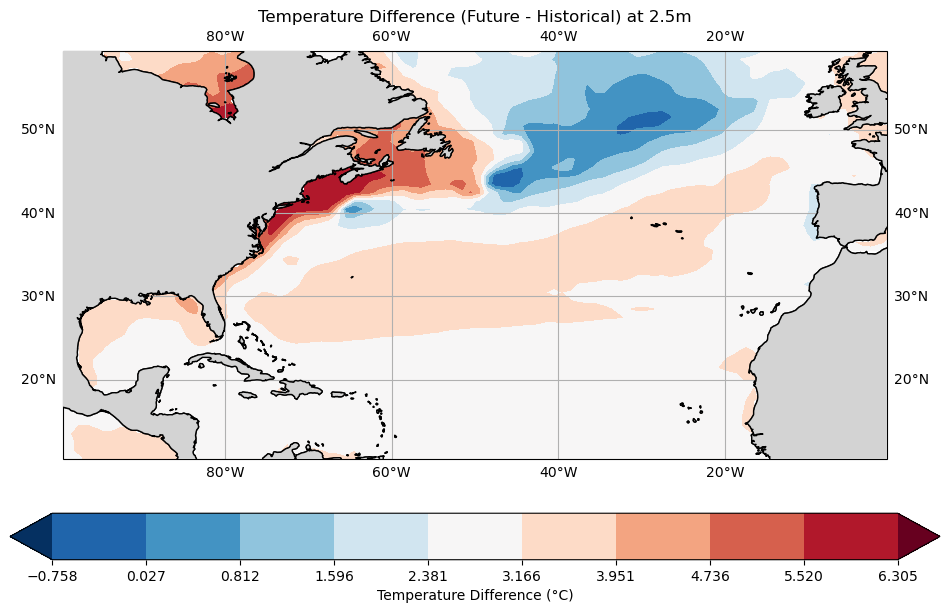

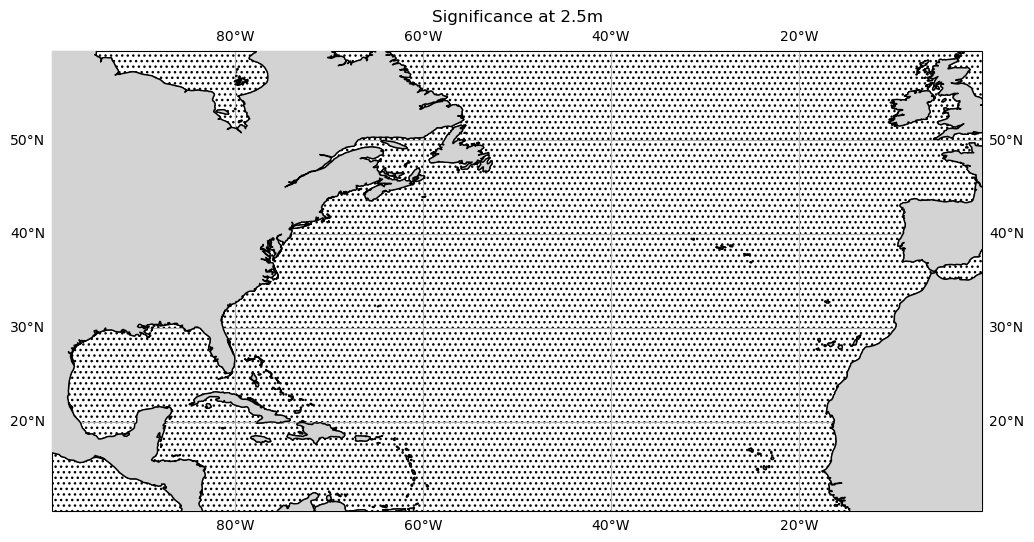

In [8]:
import cartopy.feature as cfeature # geographical plotting

# Time-mean temperatures
t_hist_mean_2p5m = t_hist_2p5m.mean(dim='time')
t_fut_mean_2p5m = t_fut_2p5m.mean(dim='time')

# Temperature differences
diff_mean_2p5m = t_fut_mean_2p5m - t_hist_mean_2p5m

# Inter-annual variability
hist_var_2p5m = t_hist_2p5m.groupby('time.year').mean(dim='time').std(dim='year')
fut_var_2p5m = t_fut_2p5m.groupby('time.year').mean(dim='time').std(dim='year')

# 2.5m
# Statistical significance using t-test
t_stat_2p5m, p_value_2p5m = stats.ttest_ind_from_stats(
    mean1=t_hist_mean_2p5m, std1=hist_var_2p5m, nobs1=t_hist_2p5m.sizes['time'],
    mean2=t_fut_mean_2p5m, std2=fut_var_2p5m, nobs2=t_fut_2p5m.sizes['time']
)

# Create significance marks for plotting locations of statistical significance
sig_mark_2p5m = p_value_2p5m < 0.05

# Define the plot function
def plot_temp_diff_and_sig_2p5m(t_hist_2p5m, t_fut_2p5m, sig_mark):
    """Create separate plots for temperature differences and significance at 2.5m."""
    
    # Calculate time means
    hist_mean = t_hist_2p5m.mean('time')
    fut_mean = t_fut_2p5m.mean('time')
    temp_diff = fut_mean - hist_mean
    
    # Determine min and max temperature differences
    vmin = temp_diff.min().values
    vmax = temp_diff.max().values
    
    # Create figures for temperature difference
    fig1 = plt.figure(figsize=(12, 8))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    
    levels = np.linspace(vmin, vmax, 10)  # Adjust range to min and max values
    cf = temp_diff.plot.contourf(
        ax=ax1,
        levels=levels,
        extend='both',
        cmap='RdBu_r',
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    
    # Add coastlines and grid
    ax1.coastlines()
    ax1.gridlines(draw_labels=True)
    ax1.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')
    
    # Add title
    title_diff = 'Temperature Difference (Future - Historical) at 2.5m'
    plt.title(title_diff)
    
    # Add colorbar
    plt.subplots_adjust(bottom=0.2)
    cbar = plt.colorbar(cf, orientation='horizontal', extend='both', ax=ax1, pad=0.1)
    cbar.set_label('Temperature Difference (°C)')
    
    # Show plot
    plt.show()
    
    # Create figure for significance
    fig2 = plt.figure(figsize=(12, 8))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    
    # Plot significance with hatching
    lon2d, lat2d = np.meshgrid(temp_diff.lon, temp_diff.lat)
    ax2.contourf(lon2d, lat2d, sig_mark, colors='none',
                 hatches=['...' if sig else '' for sig in sig_mark.flatten()],
                 transform=ccrs.PlateCarree())
    
    # Add coastlines and grid
    ax2.coastlines()
    ax2.gridlines(draw_labels=True)
    ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')
    
    # Add title
    title_sig = 'Significance at 2.5m'
    plt.title(title_sig)

    # Show plot
    plt.show()

# Display temperature difference and significance plots for 2.5m
plot_temp_diff_and_sig_2p5m(t_hist_2p5m, t_fut_2p5m, sig_mark_2p5m)


**Figure 3:** Top - Temperature Difference (Future - Historical) at 2.5m. Mean temperature difference at 2.5 meters in the North Atlantic Ocean between 2050-2100 and 1950-2000 ranges from -0.758°C to 6.305°C, with blue for cooler areas and red for warmer regions.
Bottom - Statistical Significance of Temperature Differences at 2.5m. Stippling patterns indicate significant temperature differences between future (2050-2100) and historical (1950-2000) periods at 2.5 meters at the 95% confidence level, covering the North Atlantic, parts of North America, and Europe 

__________________________________________________________________________________________________________________________________________________________________________________________________________

#### 2500m

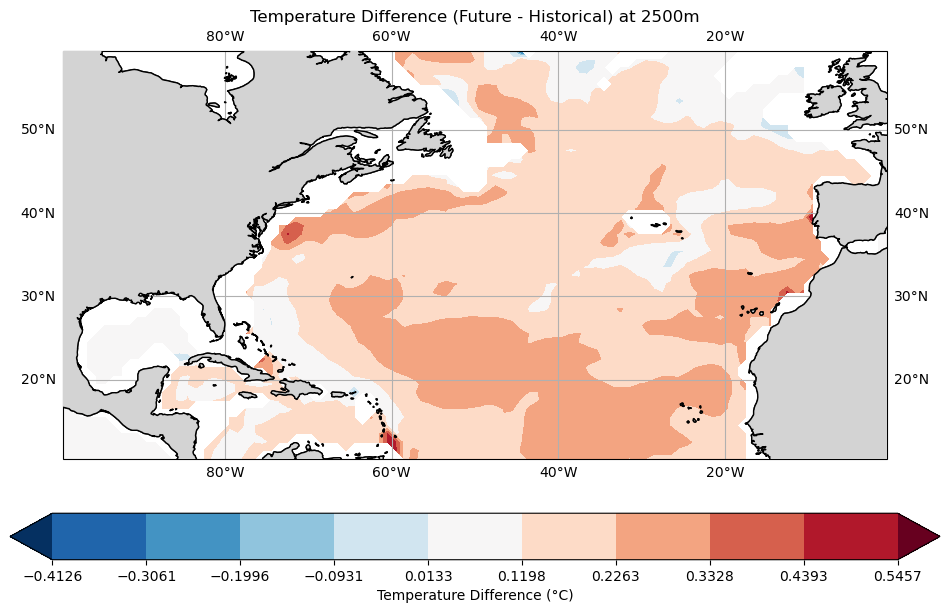

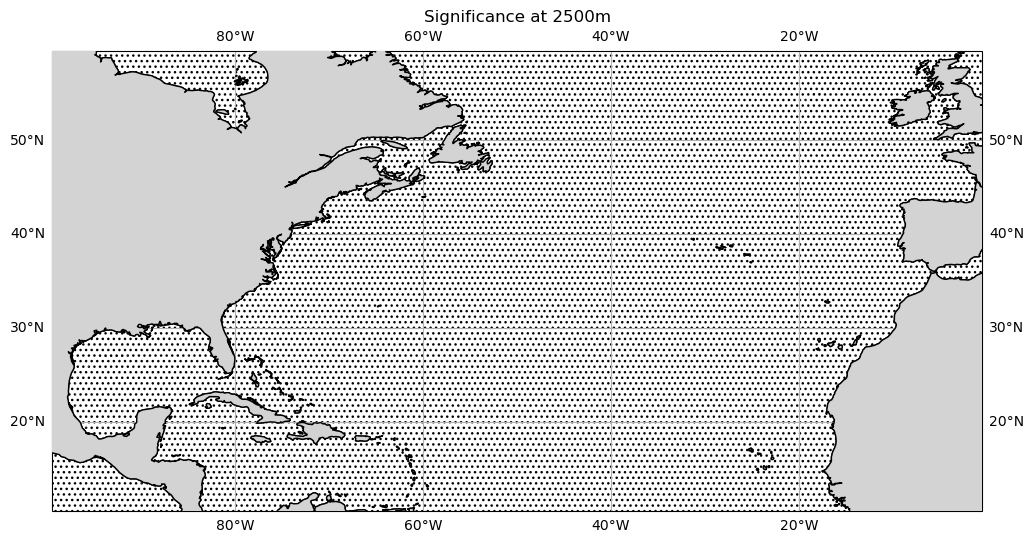

In [9]:
# Time-mean temperatures
t_hist_mean_2500m = t_hist_2500m.mean(dim='time')
t_fut_mean_2500m = t_fut_2500m.mean(dim='time')

# Temperature differences
diff_mean_2500m = t_fut_mean_2500m - t_hist_mean_2500m

# Inter-annual variability
hist_var_2500m = t_hist_2500m.groupby('time.year').mean(dim='time').std(dim='year')
fut_var_2500m = t_fut_2500m.groupby('time.year').mean(dim='time').std(dim='year')

# Statistical significance using t-test
t_stat_2500m, p_value_2500m = stats.ttest_ind_from_stats(
    mean1=t_hist_mean_2500m, std1=hist_var_2500m, nobs1=t_hist_2500m.sizes['time'],
    mean2=t_fut_mean_2500m, std2=fut_var_2500m, nobs2=t_fut_2500m.sizes['time']
)

# Create significance marks
sig_mark_2500m = p_value_2500m < 0.05

# Define the plot function
def plot_temp_diff_and_sig_2500m(t_hist_2500m, t_fut_2500m, sig_mark):
    """Create separate plots for temperature differences and significance at 2500m."""
    
    # Calculate time means
    hist_mean = t_hist_2500m.mean('time')
    fut_mean = t_fut_2500m.mean('time')
    temp_diff = fut_mean - hist_mean
    
    # Determine min and max temperature differences
    vmin = temp_diff.min().values
    vmax = temp_diff.max().values
    
    # Create figures for temperature difference
    fig1 = plt.figure(figsize=(12, 8))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    
    levels = np.linspace(vmin, vmax, 10)  # Adjust range to min and max values
    cf = temp_diff.plot.contourf(
        ax=ax1,
        levels=levels,
        extend='both',
        cmap='RdBu_r',
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    
    # Add coastlines and grid
    ax1.coastlines()
    ax1.gridlines(draw_labels=True)
    ax1.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')
    
    # Add title
    title_diff = 'Temperature Difference (Future - Historical) at 2500m'
    plt.title(title_diff)
    
    # Add colorbar
    plt.subplots_adjust(bottom=0.2)
    cbar = plt.colorbar(cf, orientation='horizontal', extend='both', ax=ax1, pad=0.1)
    cbar.set_label('Temperature Difference (°C)')
    
    # Show plot
    plt.show()
    
    # Create figure for significance
    fig2 = plt.figure(figsize=(12, 8))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    
    # Plot significance with hatching
    lon2d, lat2d = np.meshgrid(temp_diff.lon, temp_diff.lat)
    ax2.contourf(lon2d, lat2d, sig_mark, colors='none',
                 hatches=['...' if sig else '' for sig in sig_mark.flatten()],
                 transform=ccrs.PlateCarree())
    
    # Add coastlines and grid
    ax2.coastlines()
    ax2.gridlines(draw_labels=True)
    ax2.add_feature(cfeature.LAND, zorder=100, edgecolor='k', facecolor='lightgray')
    
    # Add title
    title_sig = 'Significance at 2500m'
    plt.title(title_sig)

    # Show plot
    plt.show()

# Display temperature difference and significance plots for 2500m
plot_temp_diff_and_sig_2500m(t_hist_2500m, t_fut_2500m, sig_mark_2500m)


**Figure 4:** Top - Temperature Difference (Future - Historical) at 2500m. Mean temperature difference at 2500 meters in the North Atlantic Ocean between 2050-2100 and 1950-2000 ranges from -0.4126°C to 0.5457°C, with blue for cooler areas and red for warmer regions.
Bottom - Statistical Significance of Temperature Differences at 2500m. Stippling patterns indicate significant temperature differences between future (2050-2100) and historical (1950-2000) periods at 2500 meters at the 95% confidence level, covering the North Atlantic, parts of North America, and Europe

__________________________________________________________________________________________________________________________________________________________________________________________________________

#### Results - TASK 2
The results clearly illustrate the spatial and temporal patterns of temperature variations. The maps of temperature differences illustrated statistically significant warming at 2.5m, with recorded temperature increases of 6.31°C along the eastern coast of North America. However, certain regions exhibited statistically significant cooling, with decreases of -0.76°C. At 2500m, temperatures showed uniform warming trends in the North Atlantic, peaking at 0.54°C. In addition, figures for 2.5 meters and 2500 meters depths included plots with stippling patterns to indicate statistically significant temperature differences at the 95% confidence level, highlighting regions with significant climatic changes.
The depth comparison reveals distinct patterns: The shallow waters (2.5 meters) demonstrated more pronounced and diverse temperature fluctuations, featuring both warming and cooling regions. In contrast, the deep waters (2500 meters) exhibited a consistent warming pattern. The notable variations observed at shallower depths could have significant ecological implications, whereas the gradual warming of the deep ocean may affect long-term oceanic circulation and climate patterns.
Overall, these figures and the analysis provide comprehensive insights into temperature variations, highlighting statistically significant changes and enabling comparisons of climate change impacts at different ocean depths, fulfilling the task's requirements.

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Task 3
Produce 2-dimensional (latitude-longitude) maps showing the differences in time-mean temperature between the historical and future period, for northern hemisphere summer months (June, July, August) and winter months (December, January, February).

The following code chunks calculates and plots 2-dimensional (latitude-longitude) maps showing the differences in time-mean temperatures between historical (1950-2000) and future (2050-2100) periods for northern hemisphere summer months (June, July, August)(figure 5) and winter months (December, January, February) (figure 6) at both 2.5m and 2500m depths. It defines functions to calculate seasonal means, computes temperature differences for each season and depth, and visualizes these differences using maps, providing a clear representation of seasonal temperature changes over time.

(1) northern hemisphere summer months (June, July & August)

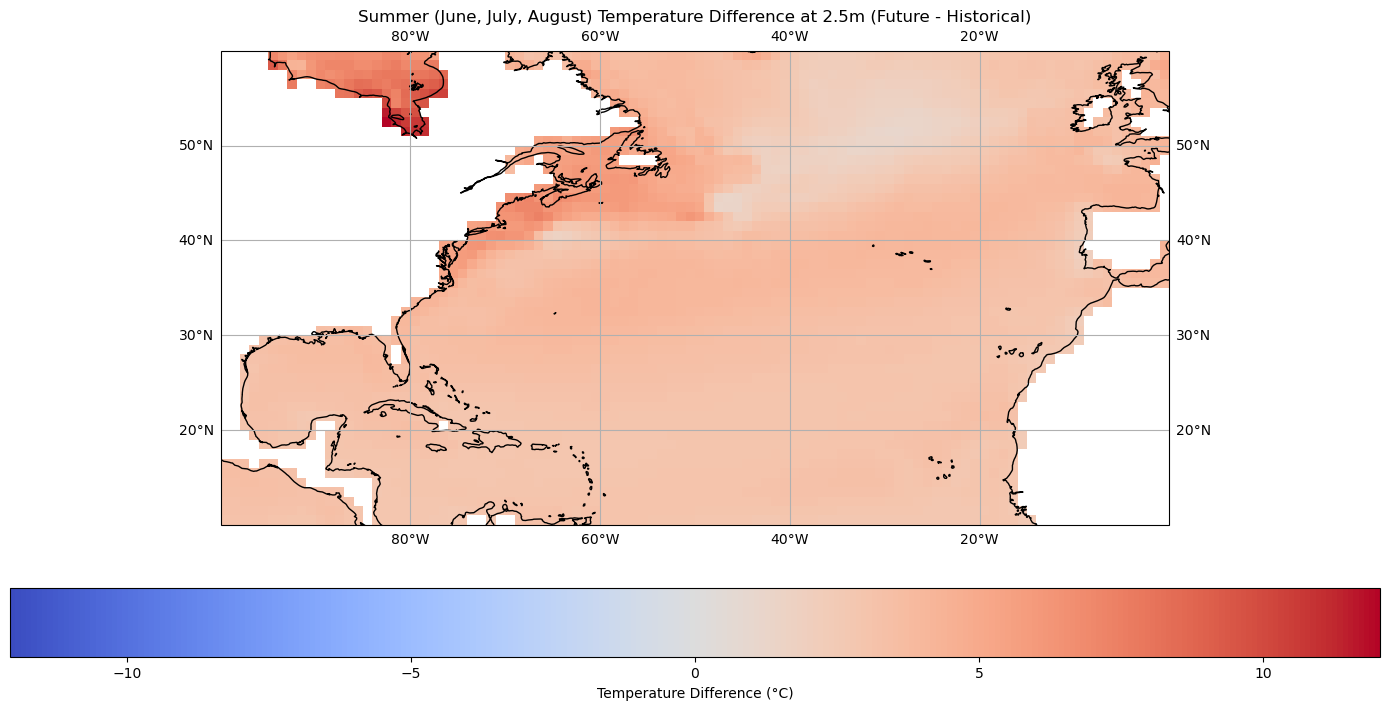

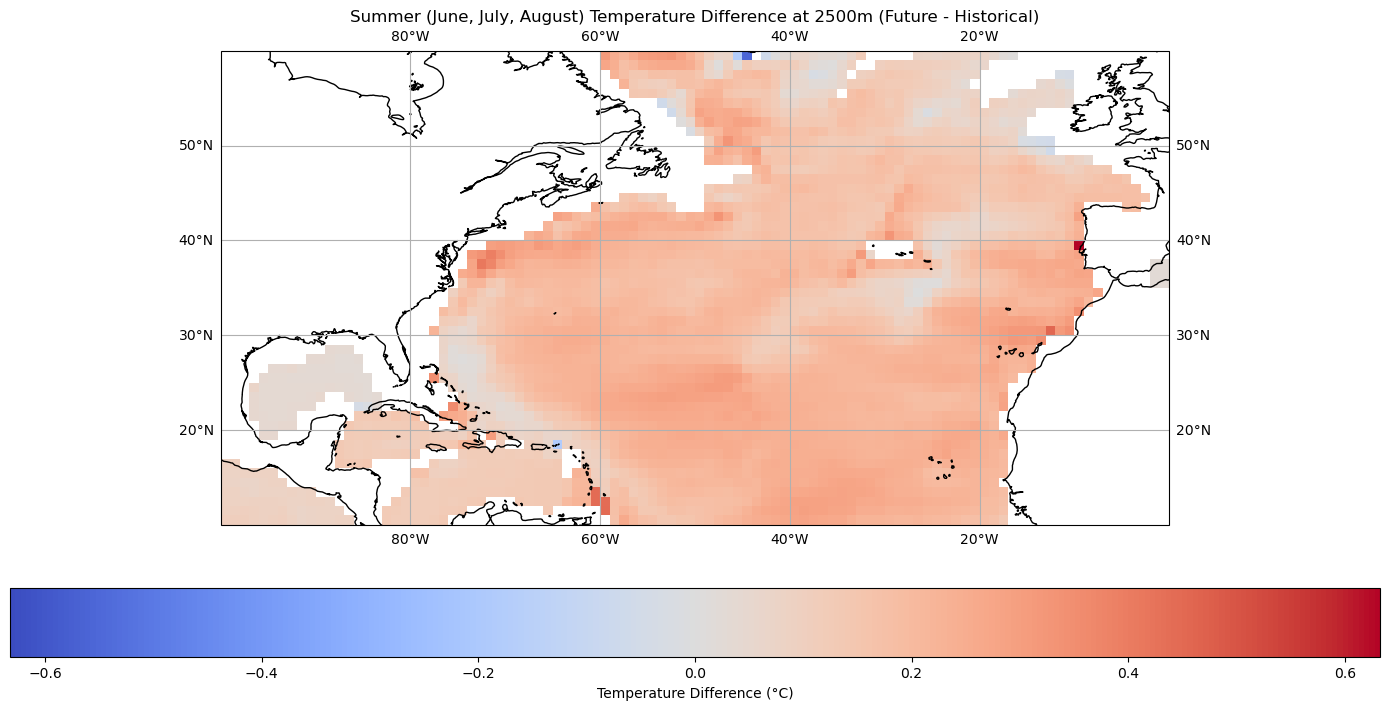

In [10]:
# Define the summer months = June, July & August
summer_months = [6, 7, 8]

# Define a function to calculate seasonal means
def seasonal_mean(data, months):
    return data.sel(time=data['time.month'].isin(months)).mean(dim='time')

# Calculate summer means at 2.5m
t_hist_summer_2p5m = seasonal_mean(t_hist_2p5m, summer_months)
t_fut_summer_2p5m = seasonal_mean(t_fut_2p5m, summer_months)

# Compute summer differences
summer_diff_2p5m = t_fut_summer_2p5m - t_hist_summer_2p5m

# Plot summer differences at 2.5m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
summer_diff_2p5m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(summer_diff_2p5m)), vmax=np.max(np.abs(summer_diff_2p5m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Summer (June, July, August) Temperature Difference at 2.5m (Future - Historical)')
plt.tight_layout()
plt.show()

# Calculate summer means at 2500m
t_hist_summer_2500m = seasonal_mean(t_hist_2500m, summer_months)
t_fut_summer_2500m = seasonal_mean(t_fut_2500m, summer_months)

# Calculate summer differences
summer_diff_2500m = t_fut_summer_2500m - t_hist_summer_2500m

# Plot summer differences at 2500m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
summer_diff_2500m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(summer_diff_2500m)), vmax=np.max(np.abs(summer_diff_2500m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Summer (June, July, August) Temperature Difference at 2500m (Future - Historical)')
plt.tight_layout()
plt.show()


**Figure 5:** Summer (June, July, August) Temperature Difference (Future - Historical) in the North Atlantic. This map illustrates the projected temperature differences between future (2050-2100) and historical (1950-2000) summer temperatures across the North Atlantic region at a depth of 2.5 meters and 2500 meters. The top map displays the temperature difference at 2.5 meters, with a color gradient ranging from blue (cooling) to red (warming), representing temperature differences from -10°C to +10°C. Significant warming is observed, particularly in the northern areas, with some regions showing substantial temperature increases. A few areas exhibit slight cooling, indicated by blue regions. The bottom map shows the temperature difference at 2500 meters, with a color gradient ranging from blue (cooling) to red (warming), representing temperature differences from -0.6°C to +0.6°C. This map highlights more uniform and less drastic temperature changes at greater depths. 

__________________________________________________________________________________________________________________________________________________________________________________________________________

(2) northern hemisphere winter months (December, January, February).

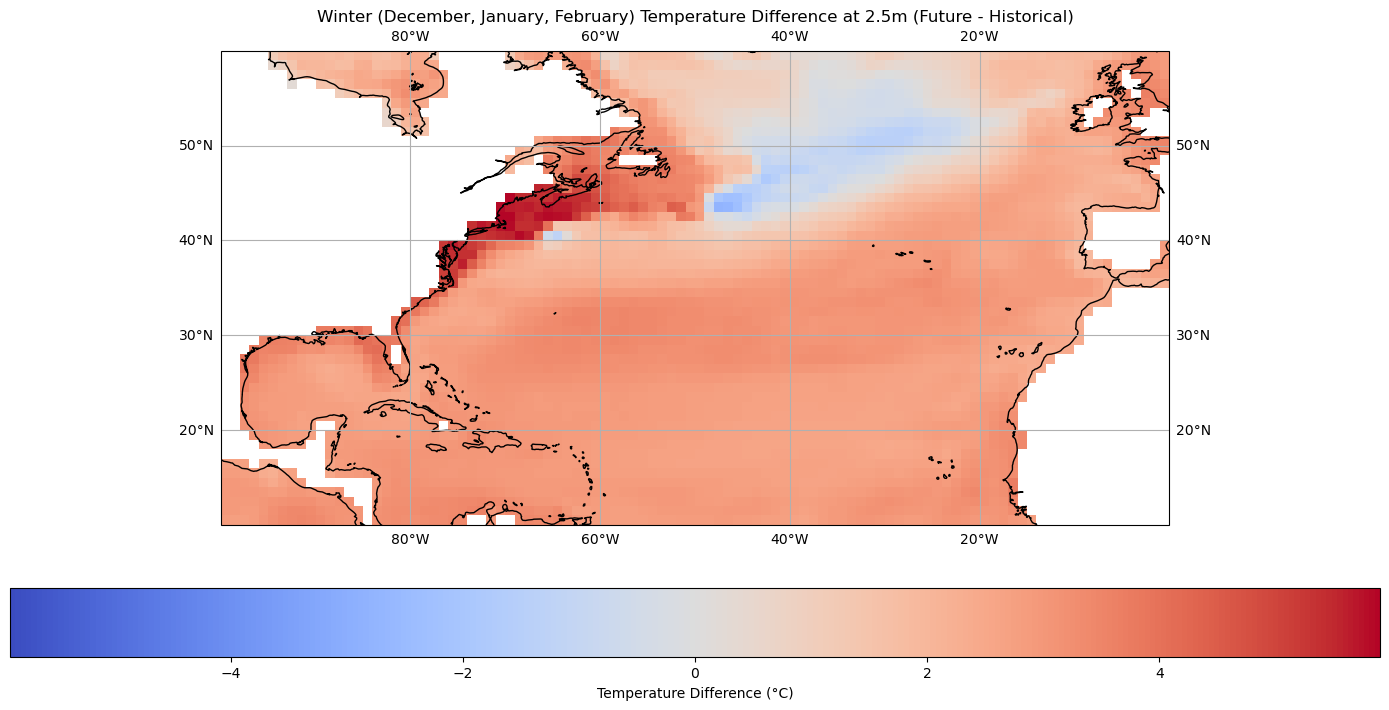

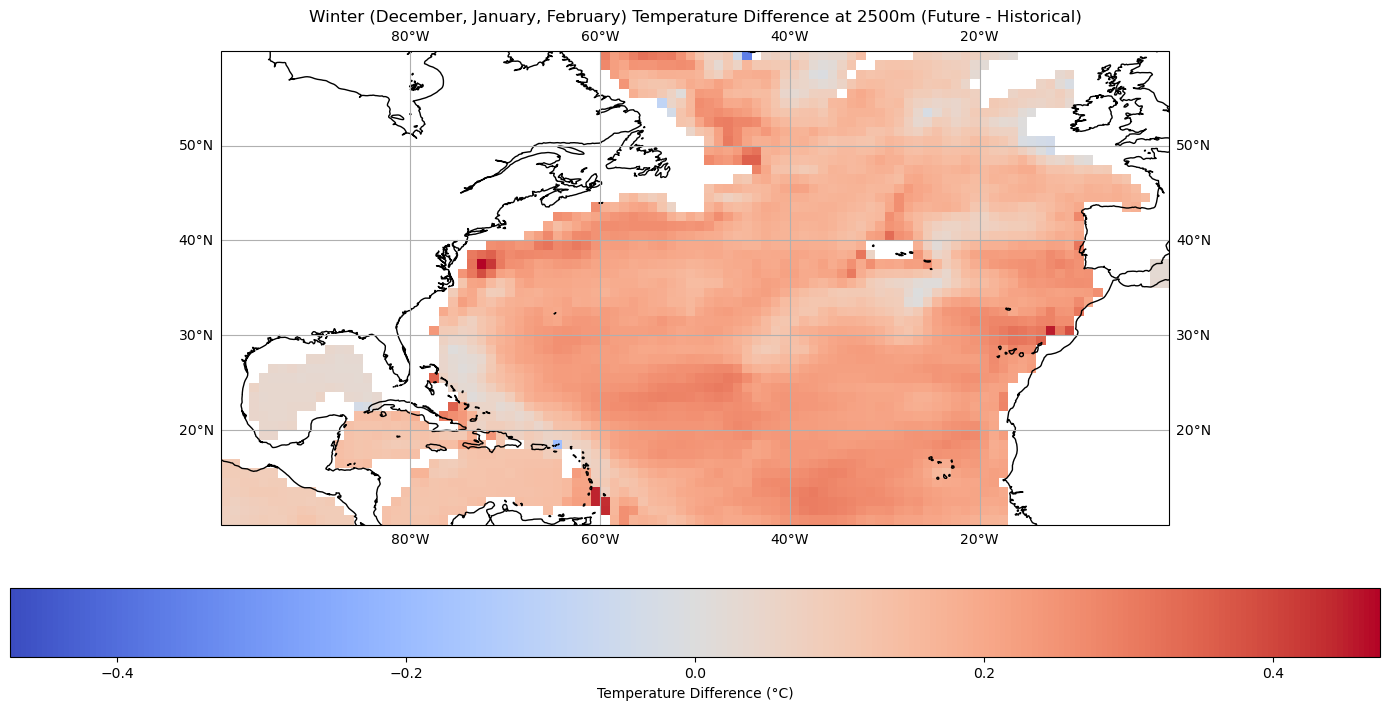

In [11]:
# Define the winter months = December, January, February
winter_months = [12, 1, 2]

# Define a function to calculate seasonal means
def seasonal_mean(data, months):
    return data.sel(time=data['time.month'].isin(months)).mean(dim='time')

# Calculate winter means at 2.5m
t_hist_winter_2p5m = seasonal_mean(t_hist_2p5m, winter_months)
t_fut_winter_2p5m = seasonal_mean(t_fut_2p5m, winter_months)

# Calculate winter differences
winter_diff_2p5m = t_fut_winter_2p5m - t_hist_winter_2p5m

# Plot winter differences at 2.5m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
winter_diff_2p5m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(winter_diff_2p5m)), vmax=np.max(np.abs(winter_diff_2p5m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Winter (December, January, February) Temperature Difference at 2.5m (Future - Historical)')
plt.tight_layout()
plt.show()

# Calculate winter means at 2500m
t_hist_winter_2500m = seasonal_mean(t_hist_2500m, winter_months)
t_fut_winter_2500m = seasonal_mean(t_fut_2500m, winter_months)

# Compute winter differences
winter_diff_2500m = t_fut_winter_2500m - t_hist_winter_2500m

# Plot winter differences at 2500m
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
winter_diff_2500m.plot(ax=ax, cmap='coolwarm', vmin=-np.max(np.abs(winter_diff_2500m)), vmax=np.max(np.abs(winter_diff_2500m)), transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Temperature Difference (°C)', 'orientation': 'horizontal', 'pad': 0.1})
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Winter (December, January, February) Temperature Difference at 2500m (Future - Historical)')
plt.tight_layout()
plt.show()


**Figure 6:** Winter (December, January, February) Temperature Difference (Future - Historical) in the North Atlantic. This map illustrates the projected temperature differences between future (2050-2100) and historical (1950-2000) winter temperatures across the North Atlantic region at a depth of 2.5 meters and 2500 meters. The top map displays the temperature difference at 2.5 meters, with a color gradient ranging from blue (cooling) to red (warming), representing temperature differences from -4°C to +4°C. Significant warming is observed along the eastern coast of North America, with some areas showing temperature increases of more than 4°C, while a few regions, particularly in the northern part of the Atlantic Ocean, exhibit slight cooling, indicated by blue areas. The bottom map shows the temperature difference at 2500 meters, with a color gradient ranging from blue (cooling) to red (warming), representing temperature differences from -0.4°C to +0.4°C, highlighting more stable temperature changes at greater depths compared to the surface level.

__________________________________________________________________________________________________________________________________________________________________________________________________________

#### Results - TASK 3
The analysis of temperature variations across different seasons reveals substantial warming in higher latitudes, particularly in the Arctic and subarctic regions.

In the summer months, the largest temperature differences between the future and historical periods are observed in higher latitudes, including Northern Canada, Northern Europe, and Siberia. These areas show significant warming due to reduced snow and ice cover. Inland continental regions, far from the moderating influence of the ocean, experience more pronounced warming. The projected temperature differences at 2.5 meters depth range from -10°C to +10°C, with significant warming observed. At 2500 meters depth, the temperature differences range from -0.6°C to +0.6°C, showing more uniform and less drastic changes compared to the surface level. 

During the winter months, the largest temperature differences occur in higher latitudes, such as the Arctic, Northern Canada, and Northern Europe. These regions exhibit substantial warming, particularly in the Arctic. Northern Hemisphere coastal regions show significant changes. The projected temperature differences at 2.5 meters depth range from -4°C to +4°C, with significant warming observed along the eastern coast of North America. At 2500 meters depth, the temperature differences range from -0.4°C to +0.4°C, highlighting more stable temperature changes at greater depths compared to the surface level. 

Overall, the analysis provides 2-dimensional (latitude-longitude) maps showing the differences in time mean temperature between the historical (1950-2000) and future (2050-2100) periods, highlighting regions and seasons with the largest temperature differences.

__________________________________________________________________________________________________________________________________________________________________________________________________________

## Task 4 
Using linear interpolation, produce two time series for the historical period only and at 2.5 m depth only, using the time period 1970-2000.

1. Location:  
   a. Location 1 (31.3N, 282.1E, 2.5m depth, Gulf Stream near Florida).  
   b. Location 2 (45.7N, 350.9E, 2.5 m depth, north of Spain).

The following code chunks produces time series for the historical period (1970-2000) at a depth of 2.5m for two specific locations: the Gulf Stream near Florida (31.3N, 282.1E) and north of Spain (45.7N, 350.9E) using linear interpolation (figure 7). 

It selects the relevant time period, interpolates temperature data to the specified coordinates, and plots the temperature time series for each location. The following chunks calculates and displays annual statistics, detrends the data to analyze and plot (figure 8) anomalies, and computes the Pearson correlation coefficient to assess the relationship between temperature anomalies at the two locations, providing information on temperature trends and correlations over time.

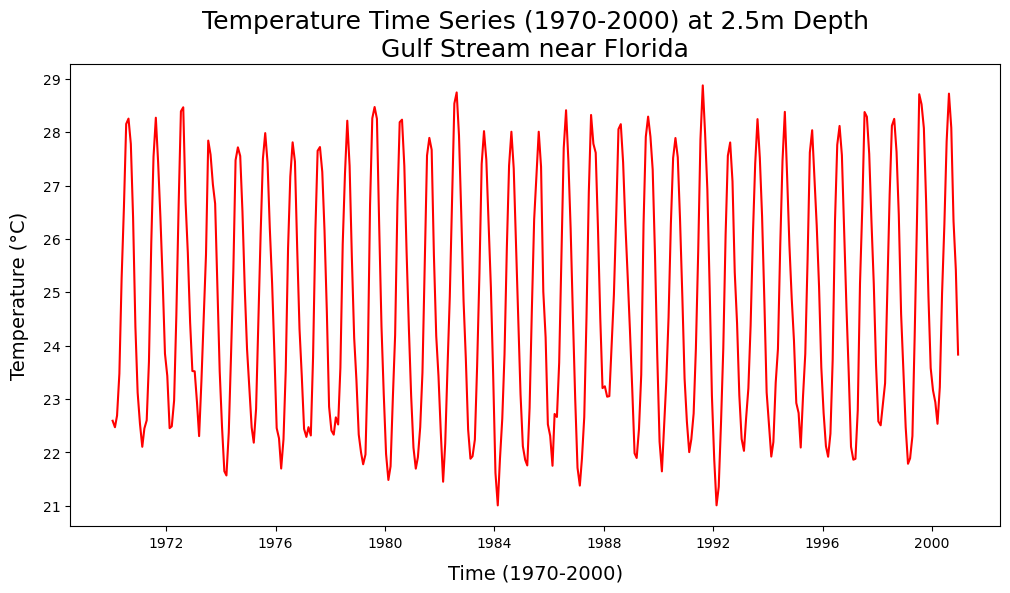

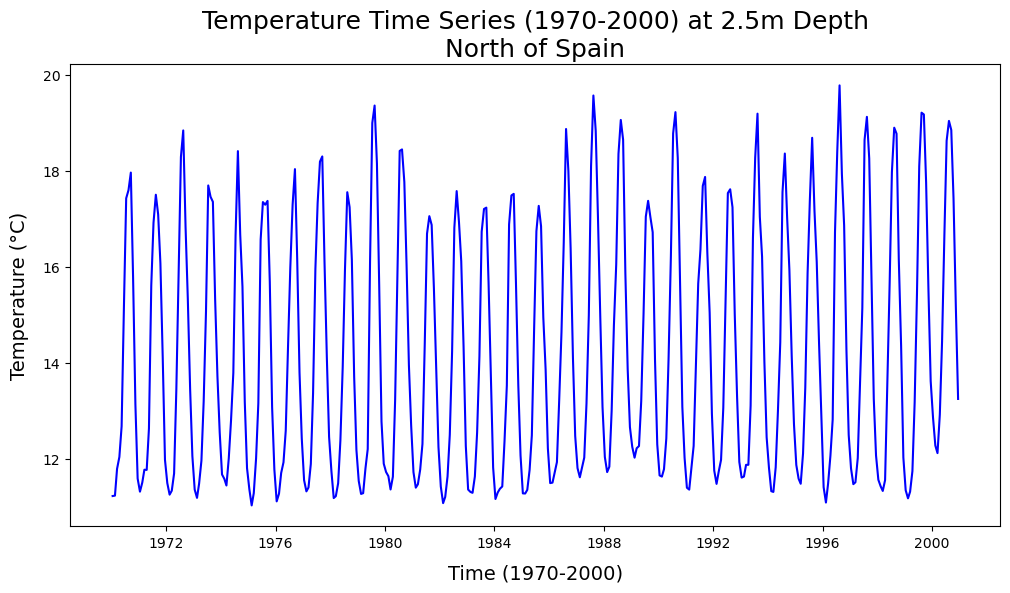

In [12]:
# Select the time period (1970 - 2000) from historical period at 2.5m depth dataset
t_hist_subset = t_hist_2p5m.sel(time=slice('1970', '2000'))

# Define the coordinates for 1a) Gulf Stream near Florida and 1b) North of Spain
gulf_stream_coords = {'lat': 31.3, 'lon': 282.1}
north_spain_coords = {'lat': 45.7, 'lon': 350.9}

# Interpolate to specific locations
gulf_stream_temp = t_hist_subset.interp(lat=gulf_stream_coords['lat'],
                                        lon=gulf_stream_coords['lon'],
                                        method='linear')  # Gulf Stream
north_spain_temp = t_hist_subset.interp(lat=north_spain_coords['lat'],
                                        lon=north_spain_coords['lon'],
                                        method='linear')  # North of Spain

# Define list of years for plotting
hist_years_2 = ["1970", "1980", "1990", "2000"]

# Create plot for Gulf Stream
plt.figure(figsize=(12, 6))
plt.plot(gulf_stream_temp.time, gulf_stream_temp,
         label='Gulf Stream near Florida (31.3°N, 282.1°E)',
         color='red')
plt.title('Temperature Time Series (1970-2000) at 2.5m Depth\nGulf Stream near Florida', fontsize=18)
plt.xlabel('Time (1970-2000)', fontsize=14, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=14, labelpad=10)
plt.show()

# Create plot for North of Spain
plt.figure(figsize=(12, 6))
plt.plot(north_spain_temp.time, north_spain_temp,
         label='North of Spain (45.7°N, 350.9°E)',
         color='blue')
plt.title('Temperature Time Series (1970-2000) at 2.5m Depth\nNorth of Spain', fontsize=18)
plt.xlabel('Time (1970-2000)', fontsize=14, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=14, labelpad=10)
plt.show()


**Figure 7:** Historical Temperature Time Series (1970-2000) at 2.5m Depth in the (Top) Gulf Stream near Florida (31.3°N, 282.1°E) and (Bottom) North of Spain (45.7°N, 350.9°E).

In [13]:
# Calculating the statistics
gulf_stream_stats = {
    'Location': 'Gulf Stream near Florida',
    'Annual Mean Temperature (°C)': gulf_stream_temp.mean().values, # mean
    'Standard Deviation (°C)': gulf_stream_temp.std().values,       # sd
    'Maximum Temperature (°C)': gulf_stream_temp.max().values,      # maximum value
    'Minimum Temperature (°C)': gulf_stream_temp.min().values       # minmum value
}

north_spain_stats = {
    'Location': 'North of Spain',
    'Annual Mean Temperature (°C)': north_spain_temp.mean().values,
    'Standard Deviation (°C)': north_spain_temp.std().values,
    'Maximum Temperature (°C)': north_spain_temp.max().values,
    'Minimum Temperature (°C)': north_spain_temp.min().values
}

# Creating the DataFrame
stats_df = pd.DataFrame([gulf_stream_stats, north_spain_stats])

# Displaying table
print(stats_df.to_string(index=False))


                Location Annual Mean Temperature (°C) Standard Deviation (°C) Maximum Temperature (°C) Minimum Temperature (°C)
Gulf Stream near Florida            24.81328524087065       2.231323579876676       28.877419052124022        21.00421333312988
          North of Spain           14.232164725334407      2.5763482152425565       19.785695648193357       11.038157386779767


### Output
|Location | Annual Mean Temperature (°C)|Standard Deviation (°C)  |Maximum Temperature (°C) |Minimum Temperature (°C) |
|-----|:---:|:---:|:-----:|:-----:|
|Gulf Stream near Florida |24.81  |2.23 |28.88 | 21 |
|North of Spain|14.23|2.58 |19.79 | 11.04 |

### Result
The Gulf Stream near Florida had an average temperature of 24.8°C (sd ± 2.2), with a maximum of 28.9°C and a minimum of 21.0°C, indicating stable conditions. In contrast, the region north of Spain averaged 14.2°C (sd ± 2.6), ranging from a maximum of 19.8°C to a minimum of 11.0°C, reflecting moderate variability.

__________________________________________________________________________________________________________________________________________________________________________________________________________

#### Detrending
The detrending process is essential for analysing temperature anomalies without long-term climate trends. The code below removes linear trends from annual mean temperature data through the following steps:
1. Applying a detrending function to remove linear trends
2. Resampling data to obtain annual temperature means.
3. Visualising anomalies for both regions.

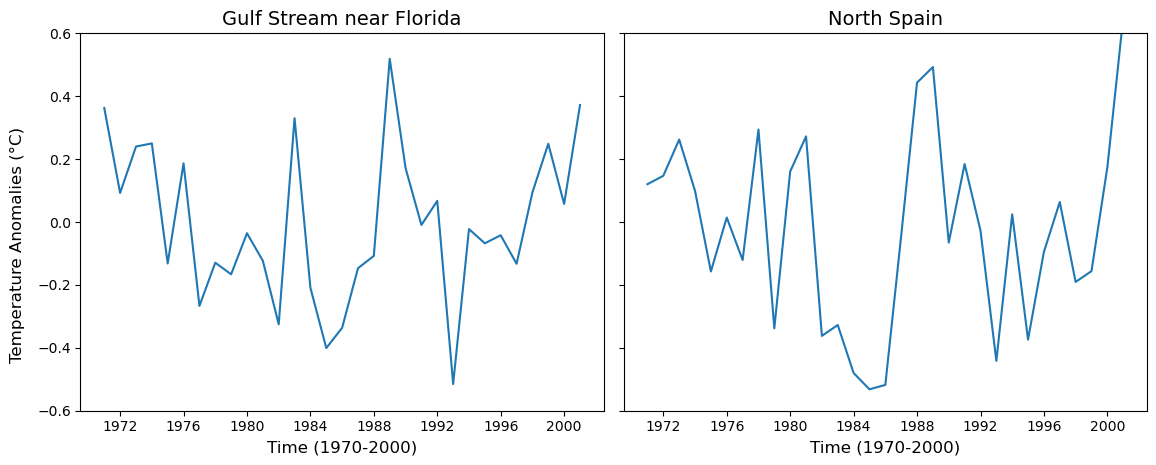

In [14]:
# Function to detrend data
def detrend(da):
    p = da.polyfit(dim='time', deg=1)
    trend = xr.polyval(da['time'], p.polyfit_coefficients)
    return da - trend

# Calculate annual means
gulf_stream_annual_mean = gulf_stream_temp.resample(time='1YE').mean()
north_spain_annual_mean = north_spain_temp.resample(time='1YE').mean()

# Detrend data
gulf_stream_anomalies = detrend(gulf_stream_annual_mean)
north_spain_anomalies = detrend(north_spain_annual_mean)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Gulf Stream near Florida anomalies
gulf_stream_anomalies.plot(ax=axes[0], label='Gulf Stream Anomalies')
axes[0].set_title('Gulf Stream near Florida', fontsize=14)
axes[0].set_xlabel('Time (1970-2000)', fontsize=12)
axes[0].set_ylim(-0.6, 0.6)
axes[0].set_yticks(np.arange(-0.6, 0.7, 0.2))

# Plot North Spain anomalies
north_spain_anomalies.plot(ax=axes[1], label='North Spain Anomalies')
axes[1].set_title('North Spain', fontsize=14)
axes[1].set_xlabel('Time (1970-2000)', fontsize=12)
axes[1].set_ylim(-0.6, 0.6)
axes[1].set_yticks(np.arange(-0.6, 0.7, 0.2))

# Set a shared y-axis label 
fig.text(0.04, 0.5, 'Temperature Anomalies (°C)', va='center', rotation='vertical', fontsize=12) 

# Adjust layout between plots 
plt.subplots_adjust(wspace=0.5) 
plt.tight_layout(rect=[0.05, 0.05, 1, 1]) 
plt.show()

**Figure 8:** Temperature anomalies from 1970 to 2000 at a depth of 2.5 meters for two locations: the Gulf Stream near Florida and North Spain. The Gulf Stream plot (left) shows temperature anomalies ranging from -0.6°C to 0.6°C, with notable peaks around 1980, 1988, and 2000, and significant dips around 1976, 1984, and 1992. The North Spain plot (right) displays similar temperature anomaly ranges, with prominent peaks around 1972, 1988, and 2000, and significant dips around 1984 and 1992.

__________________________________________________________________________________________________________________________________________________________________________________________________________

### Correlation Analysis
- This implements Pearson correlation analysis on annual means, quantifying the statistical relationship between Gulf Stream and North Spain temperature anomalies.
- The p-value assessment determines the statistical significance of the teleconnection pattern.

**Annual**

In [15]:
from scipy.stats import pearsonr # calculate Pearson correlation coefficient and p-value.

# Calculate annual means
gulf_stream_annual_mean = gulf_stream_temp.resample(time='1YE').mean() 
north_spain_annual_mean = north_spain_temp.resample(time='1YE').mean()

# Detrend data
gulf_stream_anomalies = detrend(gulf_stream_annual_mean)
north_spain_anomalies = detrend(north_spain_annual_mean)

# Convert to numpy arrays for statistical analysis
gulf_stream_anomalies_np = gulf_stream_anomalies.values
north_spain_anomalies_np = north_spain_anomalies.values

# Calculate Pearson correlation coefficient and p-value for annual data
correlation, p_value = pearsonr(gulf_stream_anomalies_np, north_spain_anomalies_np)

# increased readability – make conditional statement
# Determine p-value significance 
if p_value > 1: 
    p_value_str = ">1" 
elif p_value <= 0: 
    p_value_str = "<=0" 
elif p_value < 0.001: 
    p_value_str = "<0.001" 
elif p_value < 0.05: 
    p_value_str = "<0.05" 
elif p_value < 0.1: 
    p_value_str = "<0.1" 
else: 
    p_value_str = f"{p_value:.2f}"

# Determine Pearson correlation coefficient significance 
if correlation == 1.00:
    correlation_str = "Perfect positive correlation"
elif 0.70 <= correlation < 1.00:
    correlation_str = "Strong positive correlation"
elif 0.50 <= correlation < 0.70:
    correlation_str = "Moderate positive correlation"
elif 0.30 <= correlation < 0.50:
    correlation_str = "Weak positive correlation"
elif 0.00 <= correlation < 0.30:
    correlation_str = "Negligible correlation"
elif correlation == 0.00:
    correlation_str = "No correlation"
elif -0.30 <= correlation < 0.00:
    correlation_str = "Negligible negative correlation"
elif -0.50 <= correlation < -0.30:
    correlation_str = "Weak negative correlation"
elif -0.70 <= correlation < -0.50:
    correlation_str = "Moderate negative correlation"
elif -1.00 < correlation <= -0.70:
    correlation_str = "Strong negative correlation"
elif correlation == -1.00:
    correlation_str = "Perfect negative correlation"

# Print results - conditional statement
print(f'Pearson correlation coefficient (annual): {correlation_str}') # Pearson 
print(f'p-value (annual): {p_value_str}') # P Value

# Print results - raw values to check conditional statement is correct
print(f'Pearson correlation coefficient (annual): {correlation:.2f}') # Pearson = 0.58 
print(f'p-value (annual): {p_value:.4f}') # P Value = 0.0006

Pearson correlation coefficient (annual): Moderate positive correlation
p-value (annual): <0.001
Pearson correlation coefficient (annual): 0.58
p-value (annual): 0.0006


__________________________________________________________________________________________________________________________________________________________________________________________________________

**Monthly**

Monthly analysis provides higher temporal resolution for examining ocean temperature relationships, potentially revealing seasonal dependencies in the correlation structure between the Atlantic regions.

In [16]:
from scipy.stats import pearsonr

# Compute monthly means
gulf_stream_monthly_mean = gulf_stream_temp.resample(time='1ME').mean()
north_spain_monthly_mean = north_spain_temp.resample(time='1ME').mean()

# Detrend data
gulf_stream_anomalies_monthly = detrend(gulf_stream_monthly_mean)
north_spain_anomalies_monthly = detrend(north_spain_monthly_mean)

# Convert to numpy arrays for statistical analysis
gulf_stream_anomalies_monthly_np = gulf_stream_anomalies_monthly.values
north_spain_anomalies_monthly_np = north_spain_anomalies_monthly.values

# Calculate Pearson correlation coefficient and p-value for monthly data
correlation_monthly, p_value_monthly = pearsonr(gulf_stream_anomalies_monthly_np, north_spain_anomalies_monthly_np)

# Determine p-value significance for monthly data
if p_value_monthly > 1:
    p_value_monthly_str = ">1"
elif p_value_monthly <= 0:
    p_value_monthly_str = "<=0"
elif p_value_monthly < 0.001:
    p_value_monthly_str = "<0.001"
elif p_value_monthly < 0.05:
    p_value_monthly_str = "<0.05"
elif p_value_monthly < 0.1:
    p_value_monthly_str = "<0.1"
else:
    p_value_monthly_str = f"{p_value_monthly}"

# Determine Pearson correlation coefficient significance 
if correlation == 1.00:
    correlation_monthly_str = "Perfect positive correlation"
elif 0.70 <= correlation_monthly < 1.00:
    correlation_monthly_str = "Strong positive correlation"
elif 0.50 <= correlation_monthly < 0.70:
    correlation_monthly_str = "Moderate positive correlation"
elif 0.30 <= correlation_monthly < 0.50:
    correlation_monthly_str = "Weak positive correlation"
elif 0.00 <= correlation_monthly < 0.30:
    correlation_monthly_str = "Negligible correlation"
elif correlation_monthly == 0.00:
    correlation_monthly_str = "No correlation"
elif -0.30 <= correlation_monthly < 0.00:
    correlation_monthly_str = "Negligible negative correlation"
elif -0.50 <= correlation_monthly < -0.30:
    correlation_monthly_str = "Weak negative correlation"
elif -0.70 <= correlation_monthly < -0.50:
    correlation_monthly_str = "Moderate negative correlation"
elif -1.00 < correlation_monthly <= -0.70:
    correlation_monthly_str = "Strong negative correlation"
elif correlation_monthly == -1.00:
    correlation_monthly_str = "Perfect negative correlation"

# Print results - conditional statement
print(f'Pearson correlation coefficient (monthly): {correlation_monthly_str}')
print(f'p-value (monthly): {p_value_monthly_str}')

# Print results -  raw values to check conditional statement is correct
print(f'Pearson correlation coefficient (monthly): {correlation_monthly:.2f}') # Pearson = 0.96
print(f'p-value (monthly): {p_value_monthly}') # P = 1.71 × 10^-213

Pearson correlation coefficient (monthly): Strong positive correlation
p-value (monthly): <0.001
Pearson correlation coefficient (monthly): 0.96
p-value (monthly): 1.7178910283544054e-213


__________________________________________________________________________________________________________________________________________________________________________________________________________

#### Results - TASK 4
Temperature time series were created using linear interpolation for the period of 1970 to 2000 at a depth of 2.5 meters for two distinct locations: the Gulf Stream near Florida (31.3° N, 282.1° E) and the waters north of Spain (45.7° N, 350.9° E). These series were resampled to obtain annual mean values. Linear trends were subsequently removed from these mean values to calculate temperature anomalies, which revealed deviations from typical climate patterns.

At the Gulf Stream near Florida, the average temperature anomaly was 24.8°C with a standard deviation of 2.2, peaking at 28.9°C and dipping to a minimum of 21.0°C. This indicates relatively stable conditions over the period. Conversely, the region north of Spain displayed an average temperature anomaly of 14.2°C, with a standard deviation of 2.6, ranging from a maximum of 19.8°C to a minimum of 11.0°C. This suggests more moderate variability in temperature anomalies for this region.

The analysis of temperature anomalies highlighted a clear seasonal cycle at both locations, with fluctuations ranging from -0.4°C to 0.6°C. Despite this variability, there was a strong positive correlation between the temperature anomalies of the two regions. The Pearson correlation coefficient for the monthly anomaly time series was 0.96, with a p-value significantly less than 0.001, indicating a statistically significant correlation with a low likelihood of random chance.

Moreover, it was found that the correlation between the two locations was stronger when using monthly data rather than annual mean values. This suggests that higher temporal resolution data captures more of the variability and relationship between the temperature anomalies of the Gulf Stream near Florida and the region north of Spain. In conclusion, the temperature anomalies at these two locations are highly correlated, and the use of monthly data enhances the strength of this correlation, underscoring the synchronized temperature variations between the two regions.

__________________________________________________________________________________________________________________________________________________________________________________________________________